In [1]:
%load_ext autoreload

In [2]:
%autoreload 2

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import sys
sys.path.insert(0, '/home/mehdi/github/LSSutils')

from eboss_figs import (setup_color, plot_nz, mollweide, p0_demo, plot_overdensity,
                        nnbarchi2pdf_mocks_data, plot_deltaNqso, 
                        pcc_wnn_nchains,  plot_nstar, plot_linnn,
                        cellchi2pdf_mocks_data, plot_nsidexz, nbar_covmax, table_chi2methods,
                        p0mocks, dpvp)

In [4]:
fig_path = '/home/mehdi/data/eboss/figs/' # set path
plt.rc('font',**{'family':'sans-serif', 'size':15}) # set font
plt.rc('text', usetex=False)
setup_color() # set color and style

## redshift distribution n(z)

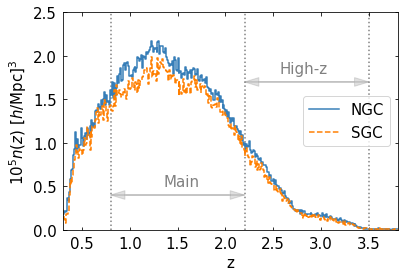

In [5]:
_ = plot_nz(fig_path + 'eboss_data_nz.pdf')

## Mollweide

column QSO_ID not in the randoms file
column IMATCH not in the randoms file
column QSO_ID not in the randoms file
column IMATCH not in the randoms file
/home/mehdi/miniconda3/envs/py3p6/lib/python3.7/site-packages/healpy/pixelfunc.py:481: RuntimeWarning: invalid value encountered in _ang2pix_ring
  return pixlib._ang2pix_ring(nside, theta, phi)
/home/mehdi/github/LSSutils/notebooks/eboss_figs.py:123: RuntimeWarning: divide by zero encountered in true_divide
  ngal_dens = ngal_tot_f / (frac_tot_f * area_1pix)
/home/mehdi/github/LSSutils/notebooks/eboss_figs.py:123: RuntimeWarning: invalid value encountered in true_divide
  ngal_dens = ngal_tot_f / (frac_tot_f * area_1pix)


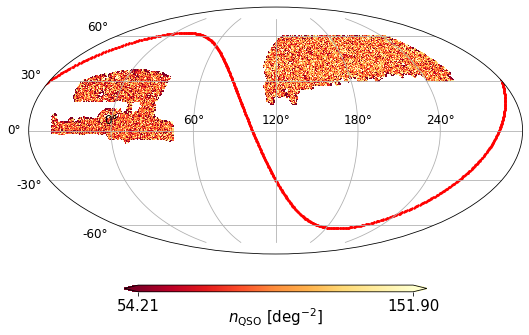

In [6]:
_ = mollweide(fig_path + 'eboss_nqso_mollweide.pdf')

/home/mehdi/data/eboss/data/v7_2/3.0/catalogs/


column QSO_ID not in the randoms file
column IMATCH not in the randoms file
column QSO_ID not in the randoms file
column IMATCH not in the randoms file
/home/mehdi/miniconda3/envs/py3p6/lib/python3.7/site-packages/healpy/pixelfunc.py:481: RuntimeWarning: invalid value encountered in _ang2pix_ring
  return pixlib._ang2pix_ring(nside, theta, phi)
column QSO_ID not in the randoms file
column IMATCH not in the randoms file
column QSO_ID not in the randoms file
column IMATCH not in the randoms file
/home/mehdi/github/LSSutils/notebooks/eboss_figs.py:180: RuntimeWarning: divide by zero encountered in true_divide
  ngal_dens = ngal_tot / (frac_tot * pix_area)
/home/mehdi/github/LSSutils/notebooks/eboss_figs.py:180: RuntimeWarning: invalid value encountered in true_divide
  ngal_dens = ngal_tot / (frac_tot * pix_area)
/home/mehdi/github/LSSutils/notebooks/eboss_figs.py:181: RuntimeWarning: divide by zero encountered in true_divide
  ngal_dens_ = ngal_tot_ / (frac_tot_ * pix_area)
/home/mehdi/g

0.0 13.213747991494973


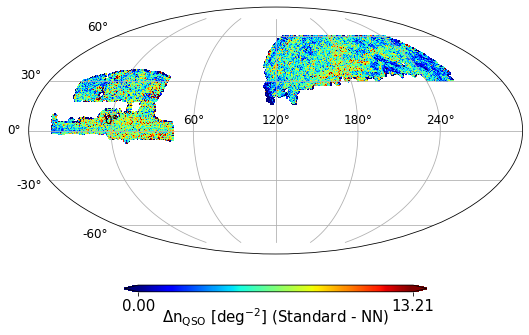

In [7]:
plot_deltaNqso(fig_path + 'eboss_dnqso_mollweide.pdf')

## power spectrum monopole

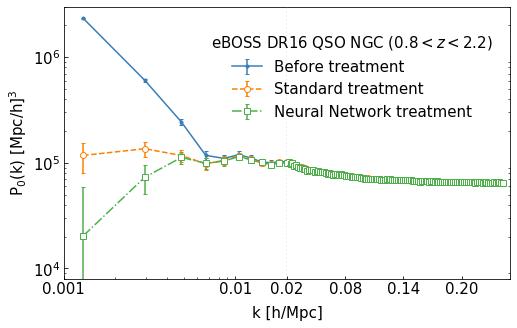

In [8]:
p0_demo(fig_path + 'p0_ngc_main.pdf', cap='NGC', show_nn=True, sample='main')

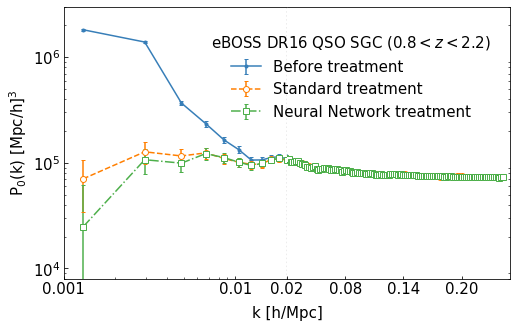

In [9]:
p0_demo(fig_path + 'p0_sgc_main.pdf', cap='SGC', show_nn=True, sample='main')

In [10]:
#p0_demo(fig_path + 'p0_ngc_highz_all.pdf', cap='NGC', show_nn=True, sample='highz', method='all')

In [11]:
#p0_demo(fig_path + 'p0_sgc_highz.pdf', cap='SGC', show_nn=True, sample='highz')

## Density Contrast

nmocks: 1000
nmocks: 999
nbins: 8
nbins: 8
nbins: 8
nbins: 8
nbins: 8
nbins: 8
nbins: 8
nbins: 8
nbins: 8
nbins: 8


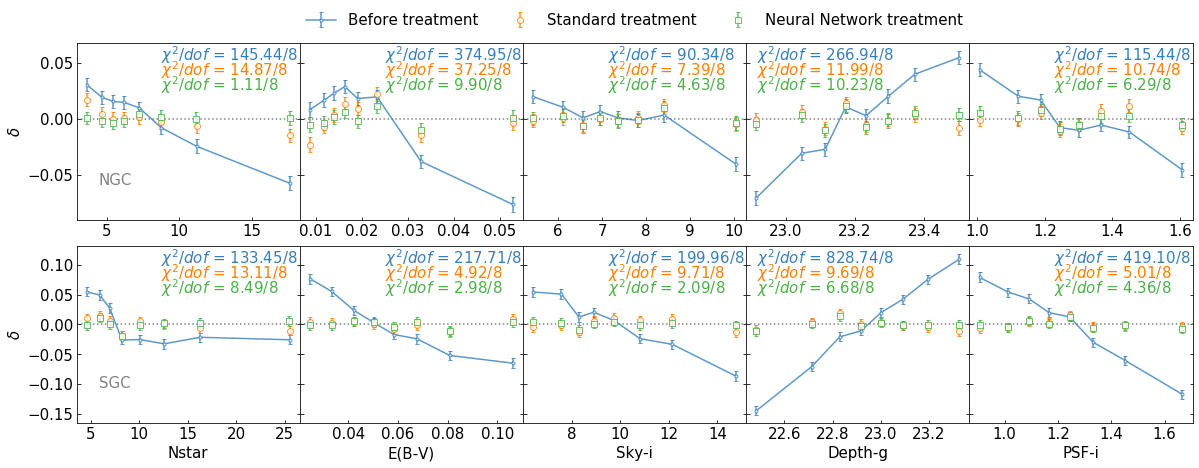

In [25]:
plot_overdensity(fig_path + 'nnbar_main_known.pdf', 'main')

In [13]:
#plot_overdensity(fig_path + 'nnbar_highz_known.pdf', 'highz')

## cov matrix from nbar mocks

len(nbars): 1000 NGC
(1000, 136)


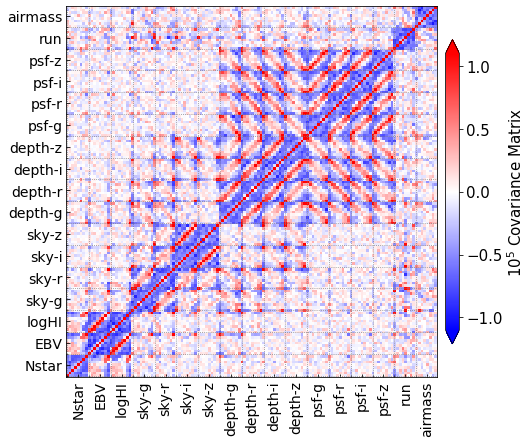

In [14]:
nbar_covmax(fig_path + 'nnbar_covmax_ngc_512.pdf')

## chi2 pdf from null mocks vs data

len(nbars): 1000 NGC
(1000, 136)
1000
[ 84.58764768  97.31549009 108.2897478  177.96379768 196.78819026
 231.86771922]
{'noweight': 1344.9104573772056, 'standard': 218.09023055116995, 'nn': 151.71384438971836}
141.0 +- 21.1
7.383262733208004


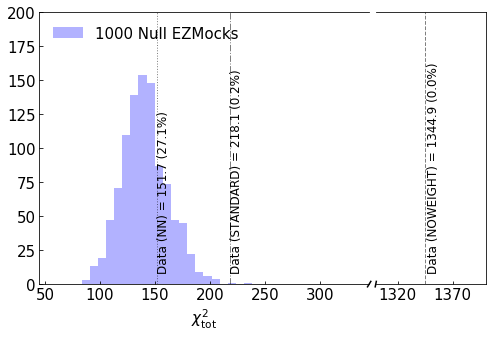

In [15]:
nnbarchi2pdf_mocks_data(fig_path + 'nnbar_chi2pdf_ngc_main.pdf', 
                        cap='NGC', 
                        xlim1=(45., 345), # 300
                        xlim2=(1300, 1400), # 100
                        xticks2=[1320, 1370]) # 50

len(nbars): 999 SGC
(999, 136)
999
[ 82.61783039  96.65861655 106.9925034  179.1638982  198.7839452
 248.19013258]
{'noweight': 1942.9844242222607, 'standard': 132.4890413320245, 'nn': 116.30955373894176}
141.4 +- 22.0
7.687665197131424


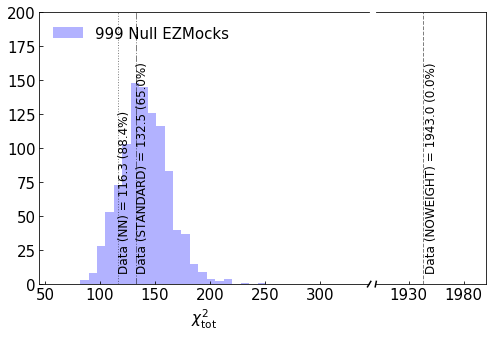

In [16]:
nnbarchi2pdf_mocks_data(fig_path + 'nnbar_chi2pdf_sgc_main.pdf', 
                        cap='SGC', 
                        xlim1=(45., 345), # 300
                        xlim2=(1900, 2000), # 100
                        xticks2=[1930, 1980]) # 50

# Cross power

ell= [ 1.62983096  3.68286698  8.3220343  18.80498406]
1000
[   3.04366273    8.12090232   14.63299218  185.81685854  344.4673862
 2295.03016076]
{'noweight': 211839.38521235017, 'standard': 338.54874160506773, 'nn': 49.76468377687504}
78.7 +- 97.4
34.087596430862924


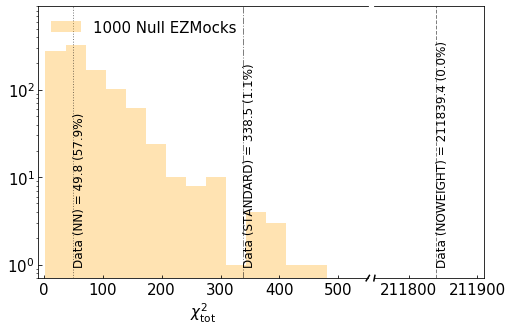

In [17]:
cellchi2pdf_mocks_data(fig_path + 'cell_chi2pdf_ngc_main.pdf', 
                        cap='NGC', 
                        xlim1=(-10., 550.), # 560
                        xlim2=(211750, 211910), # 160
                        xticks2=[211800, 211900]) # 100

ell= [ 1.62983096  3.68286698  8.3220343  18.80498406]
999
[   3.00509505    7.63111631   14.00207175  202.54445907  379.23925466
 1135.18345968]
{'noweight': 235587.56316618528, 'standard': 404.2851258753999, 'nn': 53.245872498113556}
78.1 +- 81.6
28.581035400254244


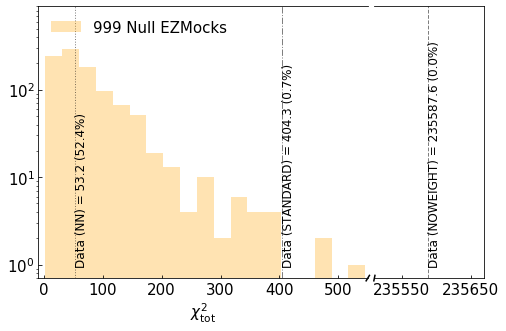

In [18]:
cellchi2pdf_mocks_data(fig_path + 'cell_chi2pdf_sgc_main.pdf', 
                        cap='SGC', 
                        xlim1=(-10., 550.), # 560
                        xlim2=(235510, 235670), # 160
                        xticks2=[235550, 235650]) # 100

# Impact of nstar

nmocks: 1000
nbins: 8


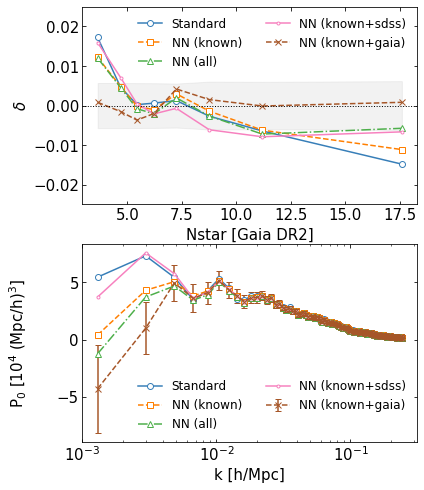

In [24]:
plot_nstar(fig_path + 'eboss_512_nbarnstar_ngc.pdf')

# NN/Linear methods

nmocks: 1000
nbins: 8


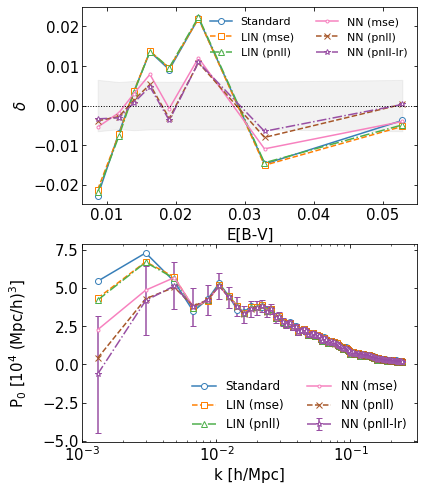

In [20]:
plot_linnn(fig_path + 'eboss_512_nbarlinnn_ngc.pdf')

nmocks: 1000
nbins: 8


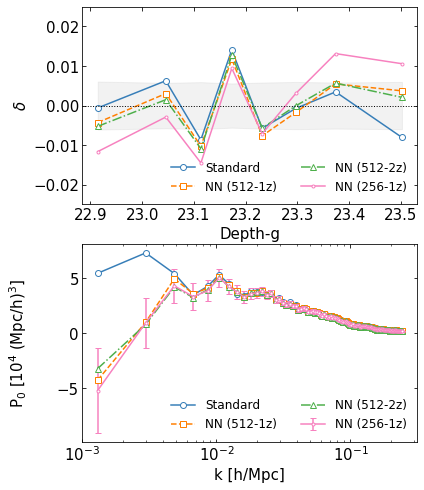

In [21]:
plot_nsidexz(fig_path + 'eboss_512_nbarzsplit_ngc.pdf')

## Table of chi2

In [22]:
table_chi2methods()

len(nbars): 1000 NGC
(1000, 136)
1000
[ 84.58764768  97.31549009 108.2897478  177.96379768 196.78819026
 231.86771922]
noweight, 1344.9105
standard, 218.0902
NN 512-1z, 151.7138
NN 512-2z, 165.4911
NN 256-1z, 217.5828
lin-mse, 213.5097
lin-pnll, 210.2262
nn-mse, 194.5648
nn-pnll, 163.9678
nn-pnll-wocos, 168.9918
nn-pnll-all, 153.9256
nn-known+gaia, 151.7138
nn-known+sdss, 184.5973


## P0 of mocks

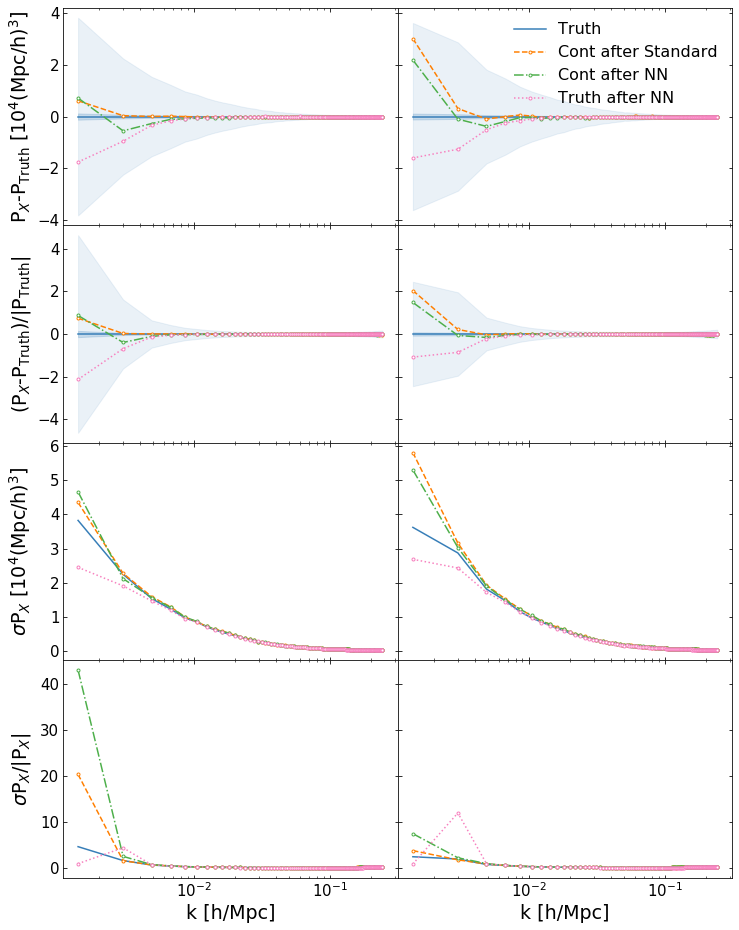

In [23]:
p0mocks(fig_path + 'ezmocks_512known.pdf')

# Mitigation bias

100%|██████████| 1000/1000 [00:03<00:00, 307.35it/s]


0.0014085807875494757 -0.8583716565983551 -10544.547016180772
0.0030163614591330397 -0.4132315168609339 -768.5757472052852
0.0048942687912127796 -0.2787485301142734 3230.327699732783
0.006745221186903896 -0.22284883075736545 5064.150510393112


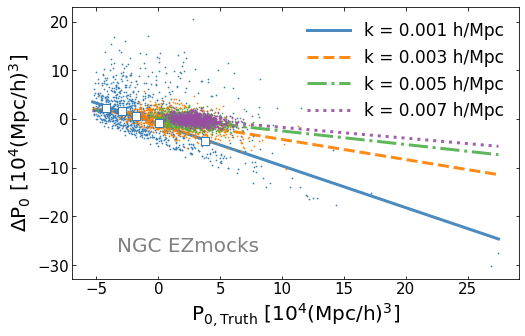

In [24]:
dpvp(fig_path + 'eboss_512_dpvsp_ngc.pdf')

## Convergence

4


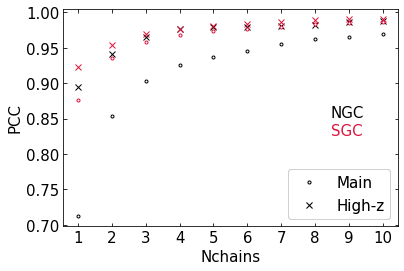

In [25]:
_ = pcc_wnn_nchains(fig_path + 'eboss_512_pccwnn_epoch.pdf', ns='512')

In [1]:
import numpy as np
from glob import glob
from matplotlib.gridspec import GridSpec
from scipy.special import gamma
import matplotlib.pyplot as plt

import sys
sys.path.append('/home/mehdi/github/LSSutils')
from lssutils.lab import histogram_cell

In [2]:
def chi2_pdf(x, k):
    """ Chi2 pdf 
    """
    k2 = k / 2.
    n_ = np.power(x, k2-1.)
    d_ = np.power(2., k2)*gamma(k2)
    return np.exp(-0.5*x)*n_/d_    

def chi2_fn(y, invcov):
    return np.dot(y, np.dot(invcov, y))    

def read_nnbar(path, ix=None):
    d = np.load(path, allow_pickle=True)
    nnbar = []
    if ix is None:        
        for di in d:
            nnbar.append(di['nnbar']-1)
    else:
        for i in ix:
            di = d[i]
            nnbar.append(di['nnbar']-1)
    return np.array(nnbar).flatten()

def get_chi2t(path, ix, incov):
    nnbar_ = read_nnbar(path, ix)
    return chi2_fn(nnbar_, invcov)

def get_chi2t_mocks(nside, cap, ix, method, iscont):
    path_ = '/home/mehdi/data/eboss/mocks/1.0/measurements/nnbar/'
    mocks = glob(f'{path_}nnbar_{cap}_{method}_mainhighz_512_v7_{iscont}_*_main_{nside}.npy')
    print('len(nbars):', len(mocks), cap)
    nmocks = len(mocks)
    err_tot = []
    for j, fn in enumerate(mocks):
        err_j = read_nnbar(fn, ix=ix)
        err_tot.append(err_j)            
    err_tot = np.array(err_tot)
    print(err_tot.shape)

    nbins = err_tot.shape[1]
    hartlapf = (nmocks-1. - 1.) / (nmocks-1. - nbins - 2.)
    indices = [i for i in range(nmocks)]
    chi2s = []
    for i in range(nmocks):
        indices_ = indices.copy()    
        indices_.pop(i)
        nbar_ = err_tot[i, :]
        err_ = err_tot[indices_, :]    
        covmax_ = np.cov(err_, rowvar=False)
        invcov_ = np.linalg.inv(covmax_*hartlapf)
        chi2_ = chi2_fn(nbar_, invcov_)
        chi2s.append(chi2_)       

    print(nmocks)
    covmax_ = np.cov(err_tot, rowvar=False)
    hartlapf = (nmocks - 1.) / (nmocks - nbins - 2.)
    invcov_ = np.linalg.inv(covmax_*hartlapf)

    return np.array(chi2s), invcov_

In [3]:
# read covariance matrix
ix = [i for i in range(17)]


chi2mocks = {}
# chi2mocks['null'] = get_chi2t_mocks('512', 'NGC', ix, 'knownsystot', '0')[0]
chi2mocks['null_nn'] = get_chi2t_mocks('512', 'NGC', ix, 'known', '0')[0]
chi2mocks['cont_standard'] = get_chi2t_mocks('512', 'NGC', ix, 'knownsystot', '1')[0]
chi2mocks['cont_nn'] = get_chi2t_mocks('512', 'NGC', ix, 'known', '1')[0]
chi2mocks['cont_noweight'] = get_chi2t_mocks('512', 'NGC', ix, 'noweight', '1')[0]

len(nbars): 1000 NGC
(1000, 136)
1000
len(nbars): 1000 NGC
(1000, 136)
1000
len(nbars): 1000 NGC
(1000, 136)
1000
len(nbars): 1000 NGC
(1000, 136)
1000


In [5]:
chi2mocks['null'] = get_chi2t_mocks('512', 'NGC', ix, 'knownsystot', '0')[0]

len(nbars): 1000 NGC
(1000, 136)
1000


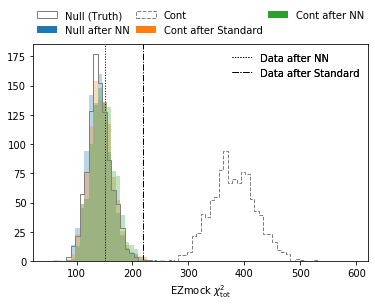

In [30]:
fig, ax = plt.subplots()

_, b, _ = ax.hist(chi2mocks['null'], bins=np.arange(50., 600., 8.0), 
                   color='grey', zorder=+10, histtype='step', label='Null (Truth)')
ax.hist(chi2mocks['null_nn'], bins=b, alpha=0.3, label='Null after NN')

ax.hist(chi2mocks['cont_noweight'], bins=b, ls='--', color='grey', label='Cont', histtype='step')
ax.hist(chi2mocks['cont_standard'], bins=b, alpha=0.3, label='Cont after Standard')
ax.hist(chi2mocks['cont_nn'], bins=b, alpha=0.3, label='Cont after NN')


l1 = ax.axvline(151., ls=':', color='k', lw=1) #, label='Data after NN')
l2 = ax.axvline(218., ls='-.', color='k', lw=1)# , label='Data after Standard')

lgnarg = dict(ncol=3,frameon=False,
             bbox_to_anchor=(0, 1.02, 1, 0.4), loc="lower left",
            mode="expand", borderaxespad=0)

leg = ax.legend(**lgnarg)
for lh in leg.legendHandles: 
    lh.set_alpha(1)
ax.add_artist(leg)
    
leg2 = ax.legend([l1, l2], ['Data after NN', 'Data after Standard'], 
                 loc='upper right', frameon=False)
ax.add_artist(leg2)    
    
# plt.yscale('log')
ax.set_xlabel(r'EZmock $\chi^{2}_{\rm tot}$')
fig.savefig('barchi2mocks.png', dpi=300, bbox_inches='tight')

In [31]:
2*3

6

In [27]:
def chi2_pdf(x, k):
    """ Chi2 pdf 
    """
    k2 = k / 2.
    n_ = np.power(x, k2-1.)
    d_ = np.power(2., k2)*gamma(k2)
    return np.exp(-0.5*x)*n_/d_    

def chi2_fn(y, invcov):
    return np.dot(y, np.dot(invcov, y))    

def read_cl(fn, ix=[i for i in range(17)], colmax=None):

    cl = np.load(fn, allow_pickle=True).item()
    cl_cross = []
    cl_ss = []

    for i in ix:    
        l_, cl_sg_ = histogram_cell(cl['cl_sg'][i]['cl'])
        l_, cl_ss_ = histogram_cell(cl['cl_ss'][i]['cl'])

        cl_ss.append(cl_ss_)
        cl_cross.append(cl_sg_[:colmax]**2/cl_ss_[:colmax])    

    return l_[:colmax], np.array(cl_cross), cl_ss

def read_clmocks(fn, cl_ss, ix=[i for i in range(17)], colmax=None):
    cl = np.load(fn, allow_pickle=True).item()
    cl_cross = []

    for i in ix:    
        l_, cl_sg_ = histogram_cell(cl['cl_sg'][i]['cl'])
        cl_ss_ = cl_ss[i]
        cl_cross.append(cl_sg_[:colmax]**2/cl_ss_[:colmax])    

    return l_[:colmax], np.array(cl_cross)

# data
cap = 'NGC'
p = '/home/mehdi/data/eboss/data/v7_2/3.0/measurements/cl/'
cl = {}
cl['noweight'] = read_cl(f'{p}cl_{cap}_noweight_mainhighz_512_v7_2_main_512.npy', colmax=4)
cl['standard'] = read_cl(f'{p}cl_{cap}_knownsystot_mainhighz_512_v7_2_main_512.npy', colmax=4)
cl['nn'] = read_cl(f'{p}cl_{cap}_known_mainhighz_512_v7_2_main_512.npy', colmax=4)    

print('ell=', cl['nn'][0])

def get_chi2mocks(cap, method, iscont):
    
    # mocks
    p = '/home/mehdi/data/eboss/mocks/1.0/measurements/cl/'
    mocks = glob(f'{p}cl_{cap}_{method}_mainhighz_512_v7_{iscont}_*')
    print(len(mocks))

    clmocks = []
    for mock_i in mocks:
        clmock_ = read_clmocks(mock_i, cl['nn'][2], colmax=4)[1]
        clmocks.append(clmock_.flatten())
    err_tot = np.array(clmocks)
    nmocks, nbins = err_tot.shape
    hartlapf = (nmocks-1. - 1.) / (nmocks-1. - nbins - 2.)
    indices = [i for i in range(nmocks)]

    # chi2 of mocks
    chi2s = []
    for i in range(nmocks):
        indices_ = indices.copy()    
        indices_.pop(i)

        nbar_ = err_tot[i, :]
        err_ = err_tot[indices_, :]    
        covmax_ = np.cov(err_, rowvar=False)
        invcov_ = np.linalg.inv(covmax_*hartlapf)

        chi2_ = chi2_fn(nbar_, invcov_)
        chi2s.append(chi2_)  
    chi2mocks = np.array(chi2s)        
    print(np.percentile(chi2mocks, [0, 1, 5, 95, 99, 100]))
    return chi2mocks

ell= [ 1.62983096  3.68286698  8.3220343  18.80498406]


In [28]:
chi2_mocks = {}
chi2_mocks['null'] = get_chi2mocks('NGC', 'knownsystot', '0')
chi2_mocks['null_nn'] = get_chi2mocks('NGC', 'known', '0')
chi2_mocks['cont_standard'] = get_chi2mocks('NGC', 'knownsystot', '1')
chi2_mocks['cont_nn'] = get_chi2mocks('NGC', 'known', '1')
chi2_mocks['cont_noweight'] = get_chi2mocks('NGC', 'noweight', '1')

1000
[   3.04366273    8.12090232   14.63299218  185.81685854  344.4673862
 2295.03016076]
1000
[  4.11621989   7.67905288  15.56046624 192.01335611 313.41146927
 548.33691736]
1000
[  5.38228599  11.00759133  18.37920456 185.90246835 298.95560461
 479.60417678]
1000
[  3.6692582   12.82102316  20.97213247 181.92990257 283.50046148
 382.92248819]
1000
[ 25.76780131  44.89261367  59.34581698 181.51339523 224.09359287
 416.33153175]


Text(0.5, 0, 'EZmock $\\chi^{2}_{\\rm tot}$')

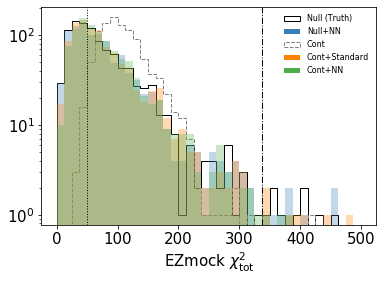

In [29]:
_, b, _ = plt.hist(chi2_mocks['null'], bins=40, range=(0, 500), color='k', zorder=-10, histtype='step', label='Null (Truth)')
plt.hist(chi2_mocks['null_nn'], bins=b, alpha=0.3, label='Null+NN')

plt.hist(chi2_mocks['cont_noweight'], bins=b, ls='--', color='grey', label='Cont', histtype='step')
plt.hist(chi2_mocks['cont_standard'], bins=b, alpha=0.3, label='Cont+Standard')
plt.hist(chi2_mocks['cont_nn'], bins=b, alpha=0.3, label='Cont+NN')


plt.axvline(50., ls=':', color='k', lw=1)
plt.axvline(338., ls='-.', color='k', lw=1)

leg = plt.legend(frameon=False, fontsize=8)
for lh in leg.legendHandles: 
    lh.set_alpha(1)
    
plt.yscale('log')
plt.xlabel(r'EZmock $\chi^{2}_{\rm tot}$')
# plt.savefig('chi2mocks.png', dpi=300, bbox_inches='tight')

In [30]:
# chi2_mocks = {}
# chi2_mocks['null'] = get_chi2mocks('SGC', 'knownsystot', '0')
# chi2_mocks['null_nn'] = get_chi2mocks('SGC', 'known', '0')
# chi2_mocks['cont_standard'] = get_chi2mocks('SGC', 'knownsystot', '1')
# chi2_mocks['cont_nn'] = get_chi2mocks('SGC', 'known', '1')
# chi2_mocks['cont_noweight'] = get_chi2mocks('SGC', 'noweight', '1')

In [31]:
# _, b, _ = plt.hist(chi2_mocks['null'], bins=40, range=(0, 500), color='k', zorder=-10, histtype='step', label='Null (Truth)')
# plt.hist(chi2_mocks['null_nn'], bins=b, alpha=0.3, label='Null+NN')

# plt.hist(chi2_mocks['cont_noweight'], bins=b, ls='--', color='grey', label='Cont', histtype='step')
# plt.hist(chi2_mocks['cont_standard'], bins=b, alpha=0.3, label='Cont+Standard')
# plt.hist(chi2_mocks['cont_nn'], bins=b, alpha=0.3, label='Cont+NN')


# plt.axvline(53., ls=':', color='k', lw=1)
# plt.axvline(404., ls='-.', color='k', lw=1)

# leg = plt.legend(frameon=False, fontsize=8)
# for lh in leg.legendHandles: 
#     lh.set_alpha(1)
    
# plt.yscale('log')
# plt.xlabel(r'EZmock $\chi^{2}_{\rm tot}$')
# plt.savefig('chi2mocks_SGC.png', dpi=300, bbox_inches='tight')